In [268]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [269]:
df_uniswap = pd.read_excel('./uniswap.xlsx')

## Sourcing WETH/USDC Daily volume from excel

In [270]:
df_uniswap.head()

,date,liquidity,sqrtPrice,token0Price,token1Price,volumeToken0,volumeToken1
0,1693612800,34767574610413266470,1960517196031701784300323608105869,1633.119091,0.000612,2.846339e+07,17450.970208
1,1693526400,32518329271341827856,1963125063563424389035592623105568,1628.783015,0.000614,2.944097e+08,180757.247410
2,1693440000,40528170921355518563,1953194977022860469243877373269587,1645.386653,0.000608,3.256741e+08,195141.980581
3,1693353600,43962356244508662164,1918462301594615397468773786985790,1705.503552,0.000586,1.862887e+08,108875.428568
4,1693267200,36289939364409044041,1905438393499974895550760592939495,1728.897889,0.000578,4.283430e+08,250919.308511


In [271]:
df_uniswap['date'] = pd.to_datetime(df_uniswap['date'],unit='s')

In [272]:
df_volume = df_uniswap[['date','volumeToken0']]

In [273]:
df_volume

,date,volumeToken0
0,2023-09-02,2.846339e+07
1,2023-09-01,2.944097e+08
2,2023-08-31,3.256741e+08
3,2023-08-30,1.862887e+08
4,2023-08-29,4.283430e+08
...,...,...
95,2023-05-30,2.247013e+08
96,2023-05-29,2.074063e+08
97,2023-05-28,2.186280e+08
98,2023-05-27,6.452754e+07


In [274]:
df_volume['fees'] = df_volume['volumeToken0']*0.0005

C:\Users\Nirmal Kumawat\AppData\Local\Temp\ipykernel_8572\781002785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volume['fees'] = df_volume['volumeToken0']*0.0005


In [275]:
df_volume

,date,volumeToken0,fees
0,2023-09-02,2.846339e+07,14231.694045
1,2023-09-01,2.944097e+08,147204.845294
2,2023-08-31,3.256741e+08,162837.050972
3,2023-08-30,1.862887e+08,93144.354441
4,2023-08-29,4.283430e+08,214171.476668
...,...,...,...
95,2023-05-30,2.247013e+08,112350.670429
96,2023-05-29,2.074063e+08,103703.169348
97,2023-05-28,2.186280e+08,109314.010615
98,2023-05-27,6.452754e+07,32263.771663


In [276]:
df_volume.set_index("date", inplace = True)

## Sourcing ETH And BTC daily data using yahoo finance

In [277]:
raw_data = yfinance.download(
                    tickers=["BTC-USD", "ETH-USD"],
                    start="2023-05-26",
                    group_by="ticker",
                    auto_adjust=True,
                    interval="1d",
                    threads=True,
                    )

[*********************100%%**********************]  2 of 2 completed


In [278]:
df_crypto_data = raw_data.copy()

In [279]:
df_crypto_data.head()

BTC-USD                                            \
                    Open          High           Low         Close   
Date                                                                 
2023-05-26  26474.181641  26916.669922  26343.949219  26719.291016   
2023-05-27  26720.181641  26888.882812  26621.140625  26868.353516   
2023-05-28  26871.158203  28193.449219  26802.751953  28085.646484   
2023-05-29  28075.591797  28432.039062  27563.876953  27745.884766   
2023-05-30  27745.123047  28044.759766  27588.501953  27702.349609   

                             ETH-USD                                         \
                 Volume         Open         High          Low        Close   
Date                                                                          
2023-05-26  12711619225  1805.725464  1837.865845  1798.406006  1828.689697   
2023-05-27   7892015141  1828.575684  1836.184570  1817.492065  1831.118286   
2023-05-28  14545229578  1831.098633  1915.723267  1825.467285  1910.914185   
2023-05-29  15181308984  1909.297485  1926.421753  1879.077515  1893.078125   
2023-05-30  13251081851  1893.093140  1916.574951  1883.934692  1901.026611   

                        
                Volume  
Date                    
2023-05-26  5451414258  
2023-05-27  3216737652  
2023-05-28  6359610561  
2023-05-29  5884674572  
2023-05-30  5363439784

In [280]:
df_crypto_data['btc'] = df_crypto_data["BTC-USD"].Close 
df_crypto_data['eth'] = df_crypto_data["ETH-USD"].Close 

In [281]:
del  df_crypto_data["BTC-USD"], df_crypto_data["ETH-USD"]

In [282]:
df_crypto_data = df_crypto_data.iloc[::-1]

In [283]:
df_crypto_data

,btc,eth
,,
Date,,
2023-09-02,25822.441406,1634.234375
2023-09-01,25800.724609,1628.491211
2023-08-31,25931.472656,1645.639160
2023-08-30,27297.265625,1705.112183
2023-08-29,27727.392578,1729.725708
...,...,...
2023-05-30,27702.349609,1901.026611
2023-05-29,27745.884766,1893.078125


In [284]:
merged_df = pd.concat([df_crypto_data, df_volume], axis=1)

In [285]:
merged_df

,"(btc, )","(eth, )",volumeToken0,fees
2023-09-02,25822.441406,1634.234375,2.846339e+07,14231.694045
2023-09-01,25800.724609,1628.491211,2.944097e+08,147204.845294
2023-08-31,25931.472656,1645.639160,3.256741e+08,162837.050972
2023-08-30,27297.265625,1705.112183,1.862887e+08,93144.354441
2023-08-29,27727.392578,1729.725708,4.283430e+08,214171.476668
...,...,...,...,...
2023-05-30,27702.349609,1901.026611,2.247013e+08,112350.670429
2023-05-29,27745.884766,1893.078125,2.074063e+08,103703.169348
2023-05-28,28085.646484,1910.914185,2.186280e+08,109314.010615
2023-05-27,26868.353516,1831.118286,6.452754e+07,32263.771663


In [286]:
merged_df.to_excel('sourced_data.xlsx')

In [287]:
final_df = pd.read_excel('sourced_data.xlsx')

In [288]:
final_df.head()

,Unnamed: 0,btc,eth,volume,fees
0,2023-09-02,25822.441406,1634.234375,2.846339e+07,14231.694045
1,2023-09-01,25800.724609,1628.491211,2.944097e+08,147204.845294
2,2023-08-31,25931.472656,1645.639160,3.256741e+08,162837.050972
3,2023-08-30,27297.265625,1705.112183,1.862887e+08,93144.354441
4,2023-08-29,27727.392578,1729.725708,4.283430e+08,214171.476668


In [289]:
final_df.rename(columns={'Unnamed: 0':'date'},inplace=True)

In [192]:
# final_df.set_index('date',inplace=True)

In [290]:
final_df['date']

0    2023-09-02
1    2023-09-01
2    2023-08-31
3    2023-08-30
4    2023-08-29
        ...    
95   2023-05-30
96   2023-05-29
97   2023-05-28
98   2023-05-27
99   2023-05-26
Name: date, Length: 100, dtype: datetime64[ns]

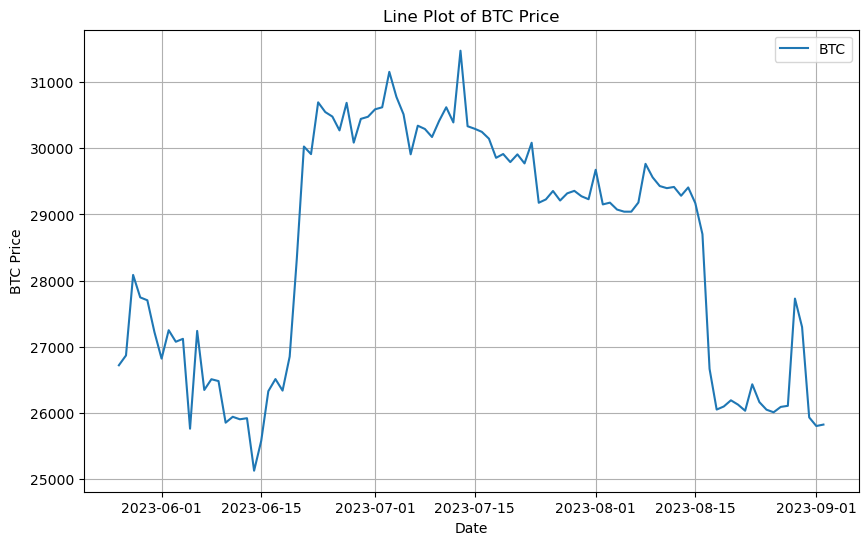

In [291]:
plt.figure(figsize=(10, 6))

plt.plot(final_df['date'], final_df['btc'],label='BTC')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('Line Plot of BTC Price')
plt.legend()
plt.grid(True)
plt.show()

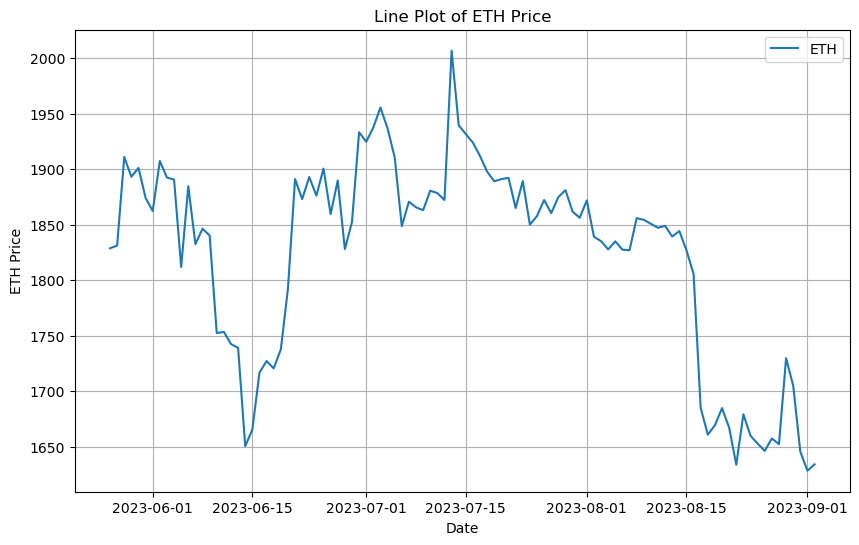

In [292]:
plt.figure(figsize=(10, 6))

plt.plot(final_df['date'], final_df['eth'], label='ETH')
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.title('Line Plot of ETH Price')
plt.legend()
plt.grid(True)
plt.show()

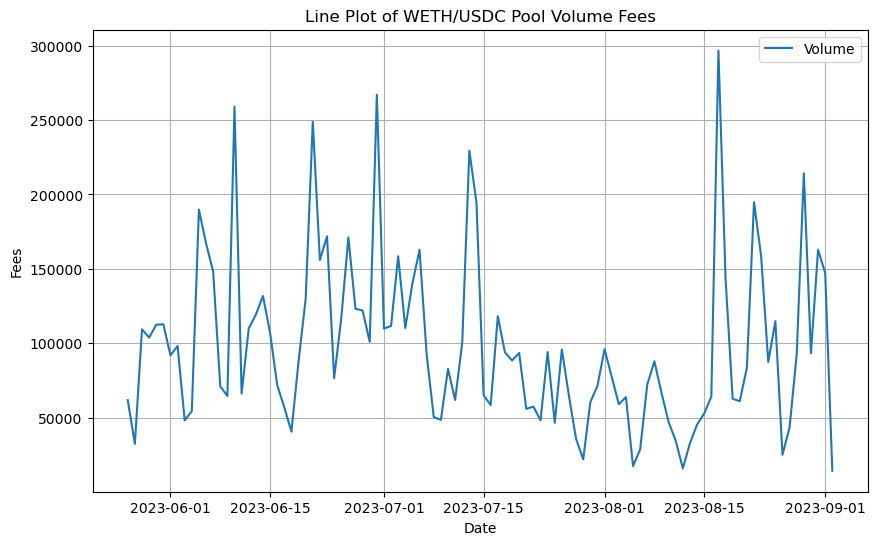

In [293]:
plt.figure(figsize=(10, 6))

plt.plot(final_df['date'], final_df['fees'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Fees')
plt.title('Line Plot of WETH/USDC Pool Volume Fees')
plt.legend()
plt.grid(True)
plt.show()

In [294]:
final_df[['btc','eth','fees']].corr()

,btc,eth,fees
btc,1.000000,0.809305,-0.015077
eth,0.809305,1.000000,-0.004181
fees,-0.015077,-0.004181,1.000000


### Modelling

In [295]:
train_i = int(len(final_df) * 0.8)
df_train, df_test = final_df.iloc[:train_i], final_df.iloc[train_i:]
df_train.head()

,date,btc,eth,volume,fees
0,2023-09-02,25822.441406,1634.234375,2.846339e+07,14231.694045
1,2023-09-01,25800.724609,1628.491211,2.944097e+08,147204.845294
2,2023-08-31,25931.472656,1645.639160,3.256741e+08,162837.050972
3,2023-08-30,27297.265625,1705.112183,1.862887e+08,93144.354441
4,2023-08-29,27727.392578,1729.725708,4.283430e+08,214171.476668


In [296]:
auto_arimax_model = auto_arima(
    df_train.fees,
    X=df_train[['btc','eth']],
    start_p=0,
    start_q=0,
    start_P=0,
    start_Q=0,
    test="adf",
    max_p=9,
    max_q=9,
    d=1,  # determine 'd'
    D=1,
  # no seasonality
    trace=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1981.912, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1974.443, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1961.533, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2247.111, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1960.964, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1962.060, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1961.958, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1960.697, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1960.864, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1962.850, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1956.675, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1959.645, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1960.332, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1960.210, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]          

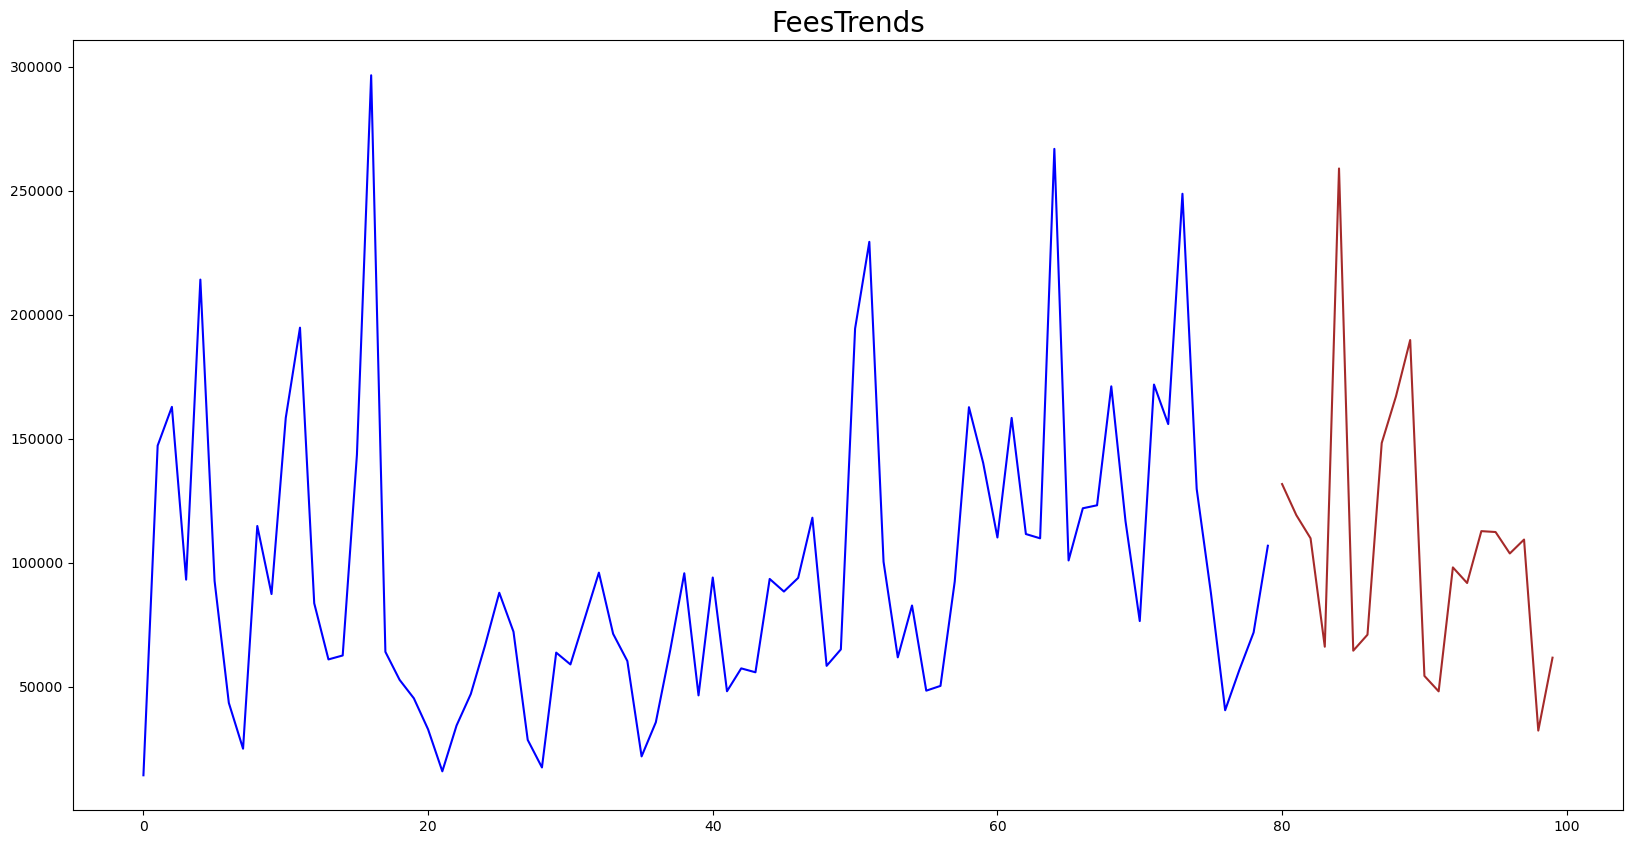

In [297]:
df_train.fees.plot(figsize=(20,10),color='blue')
df_test.fees.plot(color='brown')
plt.title("FeesTrends",size=20)
plt.show()